In [1]:
import os
os.chdir("..")

import warnings
warnings.filterwarnings("ignore")

from utils import *
from runDeepSurvModels import *

In [3]:
study = optuna.load_study(storage="sqlite:///deepsurv-torch-hp-log.db", study_name="BE00Asso00_normNone-nl-sine-5000")
optuna.visualization.plot_optimization_history(study).show() # Optimization records
optuna.visualization.plot_param_importances(study).show()  # Hyperparam importance

### Nonlinear: Sine

Training data dimensions: (98000, 541)
Testing data dimensions:  (2000, 540)
Survival time distribution:
Event rate in train set: 0.747153
Event rate in test set: 0.738500
Survival time distribution:


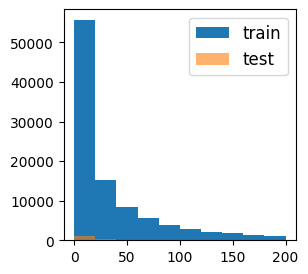

In [ ]:
# Load data
batchNormType='BE00Asso00_normNone'
dataType='nl-sine'
keywords = ['042225']

train_df, test_df = load_simulate_survival_data(batchNormType=batchNormType,
                                                dataType=dataType,
                                                keywords=keywords, 
                                                initial_split=False,
                                                keep_batch=True)

# observe data
print(f"Training data dimensions: {train_df.shape}")
print(f"Testing data dimensions:  {test_df.shape}")
print('Survival time distribution:')
plot_simulation_data(train_df, test_df)

In [ ]:
subset_sizes=[100, 500, 1000, 2000, 5000]
run_per_size=[20,20,20,20,20]
splits_per_size=[3,5,5,10,10]
trials_per_size=[20,20,20,30,30]
hyperparameters = {
    "learning_rate": {"type": "float", "low": 1e-4, "high": 1e-2, "log": True},
    "num_nodes": {"type": "categorical", "choices": [[64,64], [32,32], [16,16]]},
    "dropout": {"type": "float", "low": 0.1, "high": 0.5},
    "weight_decay": {"type": "float", "low": 1e-5, "high": 1e-2, "log": True},
    "batch_size": {"type": "categorical", "choices": [32,64,128]},
}

ds = DeepSurvPipeline(
    train_df, test_df, 
    batchNormType=batchNormType, 
    dataName=dataType,
    hyperparameters=hyperparameters
)
# optuna.logging.disable_default_handler()
model_results = ds.train_over_subsets(subset_sizes=subset_sizes, 
                                run_per_size=run_per_size, 
                                splits_per_size=splits_per_size,
                                trials_per_size=trials_per_size,
                                is_tune=True, 
                                is_save=True, 
                                n_jobs=20,
                                trial_threshold=19
)
# ds.write(model_results)
model_results

Running for N=100...


[I 2025-04-24 22:57:24,838] Using an existing study with name 'BE00Asso00_normNone-nl-sine-100' instead of creating a new one.


All hyperparameters already tuned. Skipping optimization...
(Avg. runtime: 0.41s)   |                (C-index)  Train: 0.657, Test: 0.547   |                (Brier)  Train: 0.178, Test: 0.207 (Mean)

Running for N=500...


[I 2025-04-24 22:57:56,258] Using an existing study with name 'BE00Asso00_normNone-nl-sine-500' instead of creating a new one.


All hyperparameters already tuned. Skipping optimization...
(Avg. runtime: 0.67s)   |                (C-index)  Train: 0.701, Test: 0.579   |                (Brier)  Train: 0.166, Test: 0.196 (Mean)

Running for N=1000...


[I 2025-04-24 22:58:28,404] Using an existing study with name 'BE00Asso00_normNone-nl-sine-1000' instead of creating a new one.


All hyperparameters already tuned. Skipping optimization...
(Avg. runtime: 0.92s)   |                (C-index)  Train: 0.68, Test: 0.588   |                (Brier)  Train: 0.177, Test: 0.199 (Mean)

Running for N=2000...


[I 2025-04-24 22:59:05,933] Using an existing study with name 'BE00Asso00_normNone-nl-sine-2000' instead of creating a new one.


All hyperparameters already tuned. Skipping optimization...
(Avg. runtime: 1.49s)   |                (C-index)  Train: 0.67, Test: 0.601   |                (Brier)  Train: 0.168, Test: 0.182 (Mean)

Running for N=5000...


[I 2025-04-24 22:59:55,679] Using an existing study with name 'BE00Asso00_normNone-nl-sine-5000' instead of creating a new one.


Starting hyperparam tuning: ['learning_rate', 'num_nodes', 'dropout', 'weight_decay', 'batch_size']


[I 2025-04-24 23:27:38,571] Trial 46 finished with value: 0.6247879370089714 and parameters: {'learning_rate': 0.0011493296468755687, 'num_nodes': [32, 32], 'dropout': 0.4143494920766254, 'weight_decay': 6.741271909841799e-05, 'batch_size': 32}. Best is trial 10 with value: 0.6291601140520839.
[I 2025-04-24 23:28:54,339] Trial 41 finished with value: 0.6248187768076028 and parameters: {'learning_rate': 0.0012244585799664268, 'num_nodes': [32, 32], 'dropout': 0.41022223715065387, 'weight_decay': 5.80478665545605e-05, 'batch_size': 32}. Best is trial 10 with value: 0.6291601140520839.
[I 2025-04-24 23:30:14,764] Trial 30 finished with value: 0.6256289365111873 and parameters: {'learning_rate': 0.0011989718608381662, 'num_nodes': [32, 32], 'dropout': 0.4081572160384565, 'weight_decay': 0.000833721166416508, 'batch_size': 32}. Best is trial 10 with value: 0.6291601140520839.
[I 2025-04-24 23:30:17,515] Trial 43 finished with value: 0.627595307980725 and parameters: {'learning_rate': 0.0012